In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [5]:
import pandas as pd

df = pd.read_csv("/Users/abdullah/Desktop/HU Classes/GRAD699/Amazon_reviews_2023.csv")
df.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [6]:
# Data cleaning
df = df[['text', 'rating', 'timestamp']].dropna()

df = df.rename(columns={
    'text': 'text',
    'rating': 'rating',
    'timestamp': 'timestamp'
})

df.head()


,text,rating,timestamp
0,This spray is really nice. It smells really go...,5,2020-05-05 14:08:48.923
1,"This product does what I need it to do, I just...",4,2020-05-04 18:10:55.070
2,"Smells good, feels great!",5,2020-05-16 21:41:06.052
3,Felt synthetic,1,2022-01-28 18:13:50.220
4,Love it,5,2020-12-30 10:02:43.534


In [8]:
# Convert timestamp + hour
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop any rows with empty timestamp
df = df.dropna(subset=['timestamp'])

# Extract the hour of day (0–23)
df['review_hour'] = df['timestamp'].dt.hour

df.head()


,text,rating,timestamp,review_hour
0,This spray is really nice. It smells really go...,5,2020-05-05 14:08:48.923,14
1,"This product does what I need it to do, I just...",4,2020-05-04 18:10:55.070,18
2,"Smells good, feels great!",5,2020-05-16 21:41:06.052,21
3,Felt synthetic,1,2022-01-28 18:13:50.220,18
4,Love it,5,2020-12-30 10:02:43.534,10


In [ ]:
# VADER scoring compound
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_compound(text):
    if pd.isna(text):
        return 0.0
    scores = analyzer.polarity_scores(str(text))
    return scores['compound']

# Sentiment scoring
df['compound'] = df['text'].apply(get_compound)

df[['text', 'rating', 'review_hour', 'compound']].head()


,text,rating,review_hour,compound
0,This spray is really nice. It smells really go...,5,14,0.8162
1,"This product does what I need it to do, I just...",4,18,0.7783
2,"Smells good, feels great!",5,21,0.8070
3,Felt synthetic,1,18,0.0000
4,Love it,5,10,0.6369


In [ ]:
#Sentiment by Rating

sent_by_rating = (
    df.groupby("rating")["compound"]
      .agg(["mean", "count"])
      .reset_index()
      .sort_values("rating")
)

sent_by_rating


,rating,mean,count
0,1,-0.126512,102067
1,2,0.068316,43032
2,3,0.262144,56294
3,4,0.544093,79357
4,5,0.649148,420566


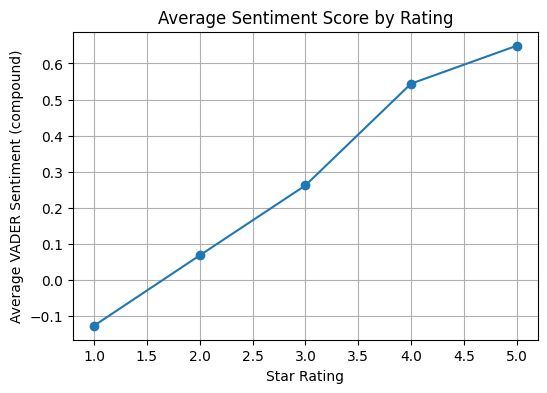

In [ ]:
# Plot average sentiment by rating
plt.figure(figsize=(6,4))
plt.plot(sent_by_rating["rating"], sent_by_rating["mean"], marker="o")
plt.xlabel("Star Rating")
plt.ylabel("Average VADER Sentiment (compound)")
plt.title("Average Sentiment Score by Rating")
plt.grid(True)
plt.show()


In [12]:
# Sentiment vs Hour of Day

sent_by_hour = (
    df.groupby("review_hour")["compound"]
      .agg(["mean", "count"])
      .reset_index()
      .sort_values("review_hour")
)

sent_by_hour


,review_hour,mean,count
0,0,0.452269,38242
1,1,0.456488,38381
2,2,0.465060,37964
3,3,0.465587,33589
4,4,0.466387,26378
5,5,0.474770,19670
6,6,0.474866,14148
7,7,0.472291,10144
8,8,0.470803,7682
9,9,0.471817,7183


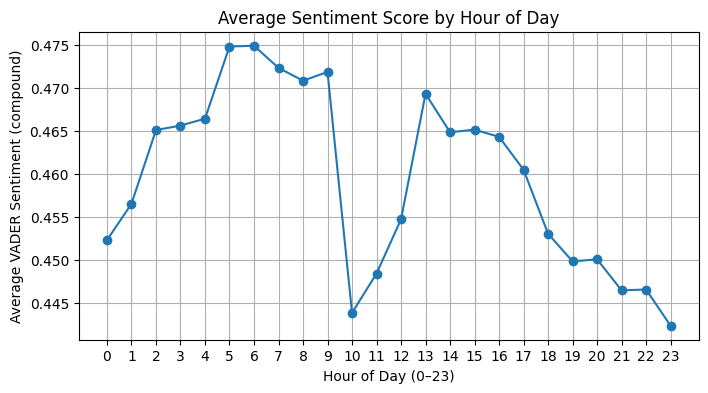

In [13]:
# Plot of Sentiment vs Hour of Day

plt.figure(figsize=(8,4))
plt.plot(sent_by_hour["review_hour"], sent_by_hour["mean"], marker="o")
plt.xticks(range(0,24))
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average VADER Sentiment (compound)")
plt.title("Average Sentiment Score by Hour of Day")
plt.grid(True)
plt.show()


In [14]:
# Binary target variable
df["is_negative"] = (df["compound"] < -0.05).astype(int)

# Also add review length (a useful feature)
df["review_length"] = df["text"].astype(str).str.len()

df[["text", "compound", "is_negative", "review_length"]].head()


,text,compound,is_negative,review_length
0,This spray is really nice. It smells really go...,0.8162,0,300
1,"This product does what I need it to do, I just...",0.7783,0,235
2,"Smells good, feels great!",0.8070,0,25
3,Felt synthetic,0.0000,0,14
4,Love it,0.6369,0,7


In [15]:
# Baseline model without time-of-day

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Baseline feature set
X_base = df[["compound", "rating", "review_length"]]
y = df["is_negative"]

# Train-test split
Xb_train, Xb_test, y_train, y_test = train_test_split(
    X_base, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler_base = StandardScaler()
Xb_train_scaled = scaler_base.fit_transform(Xb_train)
Xb_test_scaled = scaler_base.transform(Xb_test)

# Train baseline model
log_base = LogisticRegression(max_iter=1000)
log_base.fit(Xb_train_scaled, y_train)

# Predictions
y_prob_base = log_base.predict_proba(Xb_test_scaled)[:, 1]
y_pred_base = (y_prob_base >= 0.5).astype(int)

print("=== BASELINE MODEL (no time-of-day) ===")
print(classification_report(y_test, y_pred_base))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_base))


=== BASELINE MODEL (no time-of-day) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120329
           1       1.00      1.00      1.00     19935

    accuracy                           1.00    140264
   macro avg       1.00      1.00      1.00    140264
weighted avg       1.00      1.00      1.00    140264

ROC-AUC: 0.9999992241820463


In [17]:
# Baseline model with time-of-day

import numpy as np

# Add circular time-of-day features
df["hour_sin"] = np.sin(2 * np.pi * df["review_hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["review_hour"] / 24)

# Extended feature set
X_time = df[["compound", "rating", "review_length", "hour_sin", "hour_cos"]]

# Train-test split
Xt_train, Xt_test, _, _ = train_test_split(
    X_time, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler_time = StandardScaler()
Xt_train_scaled = scaler_time.fit_transform(Xt_train)
Xt_test_scaled = scaler_time.transform(Xt_test)

# Train extended model
log_time = LogisticRegression(max_iter=1000)
log_time.fit(Xt_train_scaled, y_train)

# Predictions
y_prob_time = log_time.predict_proba(Xt_test_scaled)[:, 1]
y_pred_time = (y_prob_time >= 0.5).astype(int)

print("=== MODEL WITH TIME-OF-DAY FEATURES ===")
print(classification_report(y_test, y_pred_time))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_time))



=== MODEL WITH TIME-OF-DAY FEATURES ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120329
           1       1.00      1.00      1.00     19935

    accuracy                           1.00    140264
   macro avg       1.00      1.00      1.00    140264
weighted avg       1.00      1.00      1.00    140264

ROC-AUC: 0.9999987906244581
